In [2]:
import numpy as np
import tensorflow as tf
with np.load("notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]

In [12]:
import tensorflow as tf
def MSE_loss(decay_scale, X, y):
    #initializer
    weight_init = tf.contrib.layers.xavier_initializer(uniform=True)
    const_init = tf.constant_initializer(0.01)
    
    #weight bias
    W1 = tf.get_variable("W1",shape=[X.shape[1],1],initializer=weight_init, dtype=tf.float32)
    b1  = tf.get_variable("b1",shape=[1,1],initializer=const_init, dtype=tf.float32)#broadcast
    #hidden layer
    y_ = tf.add(tf.matmul(X, W1), b1)

    #loss
    weight_decay = decay_scale/2*tf.matmul(tf.transpose(W1),(W1))
    loss = tf.nn.l2_loss(y_-y)/tf.cast(tf.shape(X)[0],tf.float32)+weight_decay
    loss = tf.squeeze(loss)
    
    predict = y_
    return loss,predict

In [13]:
def train(trainData_rs, trainTarget, learnning_rate, weight_decay_scale, batch_size=500, steps=20000):
    trainning_data = tf.constant(trainData_rs, dtype=tf.float32)
    trainning_label = tf.constant(trainTarget, dtype=tf.float32)
    #create a runner queue
    x, y = tf.train.slice_input_producer([trainning_data, trainning_label], num_epochs=None)
    #build mini-batch
    X, Y = tf.train.batch([x, y], batch_size=batch_size)
    
    loss,predict = MSE_loss(weight_decay_scale, X, Y)
    optimizer = tf.train.GradientDescentOptimizer(learnning_rate)
    train_op = optimizer.minimize(loss)
    
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    
    sess = tf.Session()
    sess.run(init_op)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    epoch_size = trainData_rs.shape[0]
    
    summary=[]
    for step in range(steps):
        _, loss_val = sess.run([train_op, loss])
        if((step*batch_size)%epoch_size==0):
            summary.append(loss_val)
            #print(loss_val)
    sess.close()
    return summary
        

In [37]:
# Q1
BATCH_SIZE = 500
LEARNING_RATES = (0.005, 0.001, 0.0001)
weight_decay_scale = 0
tf.reset_default_graph()

summarys=[]
trainData_rs = trainData.reshape([trainData.shape[0], -1])
for LEARNING_RATE in LEARNING_RATES:
    tf.reset_default_graph()
    summary=train(trainData_rs, trainTarget, LEARNING_RATE, weight_decay_scale, BATCH_SIZE, 400)
    summarys.append(summary)

0.31416112
0.122138426
0.116182975
0.08652388
0.087499216
0.08457635
0.08483431
0.07441677
0.06540454
0.06435228
0.06848937
0.06621468
0.067947075
0.057040792
0.049956556
0.05579801
0.058385342
0.053345483
0.057690512
0.052986715
0.047121834
0.05084308
0.05422397
0.04162754
0.04833144
0.045637306
0.046625674
0.043195676
0.05112426
0.048942376
0.041121263
0.04311874
0.040927026
0.037431646
0.037477013
0.048254155
0.03587062
0.04098398
0.042915635
0.038513955
0.03858342
0.040569976
0.03185155
0.032521736
0.032297857
0.040993102
0.032113917
0.03394063
0.032344125
0.037748687
0.03924678
0.03448077
0.032003943
0.031172773
0.03881576
0.031756733
0.03207945
0.03138166
0.3540434
0.13706
0.09174537
0.07895697
0.07080844
0.06843045
0.06149685
0.060249206
0.05921714
0.055965494
0.045796
0.057847552
0.046442598
0.05084492
0.04025679
0.046724953
0.04553598
0.046875384
0.04398525
0.040607393
0.03903462
0.03519463
0.03955889
0.04125788
0.041128382
0.035206635
0.03547716
0.040463563
0.036843956
0.0330

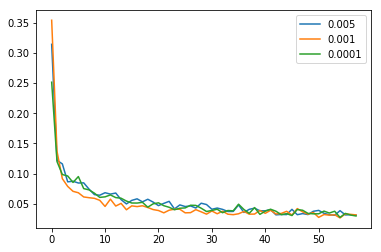

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
for i,summary in enumerate(summarys):
    plt.plot(summary, label='LearningRate= 'str(LEARNING_RATES[i]))
plt.legend()

In [ ]:
#Q2
B = [500,1500,3500]
learning_rate =  0.001
weight_decay_scale = 0
summarys=[]
trainData_rs = trainData.reshape([trainData.shape[0], -1])
for batch_size in B:
    tf.reset_default_graph()
    summary=train(trainData_rs, trainTarget, learning_rate, weight_decay_scale, batch_size, steps=400)
    summarys.append(summary)
    
# Report the final training MSE for each mini-batch value 
# What is the best mini-batch size in terms of training time? 
# Comment on your observation.

In [ ]:
#Q3
weight_decay_ratios = [0,0.001,0.1,1]
batch_size = 500
learning_rate =  0.001
summarys=[]

validData_rs = validData.reshape([validData.shape[0], -1])
for weight_decay_scale in weight_decay_ratios:
    tf.reset_default_graph()
    summary=train(validData_rs, validTarget, learning_rate, weight_decay_scale, batch_size, steps=400)
    summarys.append(summary)
    


    

In [104]:
def logistic_train(trainData_rs, trainTarget, learnning_rate, weight_decay_scale, batch_size=500, steps=20000):
    trainning_data = tf.constant(trainData_rs, dtype=tf.float32)
    trainning_label = tf.constant(trainTarget, dtype=tf.float32)
    # create a runner queue
    x, y = tf.train.slice_input_producer([trainning_data, trainning_label], num_epochs=None)
    # build mini-batch
    X, Y = tf.train.batch([x, y], batch_size=batch_size)
    
    # predict and loss
    #initializer
    weight_init = tf.contrib.layers.xavier_initializer(uniform=True)
    const_init = tf.constant_initializer(0.01)
    
    #weight bias
    W1 = tf.get_variable("W1",shape=[X.shape[1],1],initializer=weight_init, dtype=tf.float32)
    b1  = tf.get_variable("b1",shape=[1,1],initializer=const_init, dtype=tf.float32)#broadcast
    #hidden layer
    logits = tf.add(tf.matmul(X, W1), b1)
    cross_entropy_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = Y))/batch_size
    predict = tf.cast(tf.sigmoid(logits) > 0.5, tf.float32)
    #loss
    weight_decay = weight_decay_scale/2*tf.matmul(tf.transpose(W1),(W1))
    loss = cross_entropy_loss+weight_decay
    loss = tf.squeeze(loss)
    classification_accuracy = tf.reduce_sum(tf.cast(tf.equal(Y,predict), tf.float32))/batch_size
    
    optimizer = tf.train.GradientDescentOptimizer(learnning_rate)
    train_op = optimizer.minimize(loss)
    
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    
    sess = tf.Session()
    sess.run(init_op)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    epoch_size = trainTarget.shape[0]
    print("epoch_size", epoch_size)
    summary=[]
    best_loss_val, best_accu = 1.0, 0;
    for step in range(steps):
        _, loss_val, accu = sess.run([train_op, loss, classification_accuracy])
        best_loss_val = min(best_loss_val, loss_val)
        best_accu = max(best_accu, accu)
        if((step*batch_size)%epoch_size==0):
            summary.append((best_loss_val, best_accu))
            print(step, best_loss_val, best_accu)
    return summary

In [105]:
BATCH_SIZE = 500
LEARNING_RATES = (0.005, 0.001, 0.0001)
weight_decay_scale = 0.01
tf.reset_default_graph()

summarys=[]
trainData_rs = trainData.reshape([trainData.shape[0], -1])
for LEARNING_RATE in LEARNING_RATES:
    tf.reset_default_graph()
    summary=logistic_train(trainData_rs, trainTarget, LEARNING_RATE, weight_decay_scale, BATCH_SIZE, 400)
    summarys.append(summary)

epoch_size 3500
0 0.983558 0.182
7 0.671673 0.608
14 0.506233 0.838
21 0.411738 0.9
28 0.349002 0.924
35 0.304904 0.936
42 0.27135 0.952
49 0.259996 0.958
56 0.231993 0.962
63 0.219808 0.966
70 0.207655 0.966
77 0.195386 0.972
84 0.189166 0.972
91 0.181052 0.972
98 0.170462 0.976
105 0.170462 0.976
112 0.155332 0.976
119 0.155332 0.978
126 0.15278 0.98
133 0.15278 0.98
140 0.144429 0.98
147 0.134911 0.98
154 0.134911 0.98
161 0.134911 0.98
168 0.134911 0.98
175 0.134911 0.98
182 0.129931 0.98
189 0.121651 0.98
196 0.121651 0.98
203 0.121651 0.982
210 0.121106 0.982
217 0.120178 0.982
224 0.120178 0.982
231 0.114642 0.982
238 0.114642 0.988
245 0.110257 0.988
252 0.110257 0.988
259 0.110257 0.988
266 0.103677 0.988
273 0.103677 0.988
280 0.103677 0.988
287 0.103677 0.988
294 0.103677 0.988
301 0.103677 0.988
308 0.103677 0.988
315 0.103677 0.988
322 0.103677 0.988
329 0.103677 0.988
336 0.0969269 0.988
343 0.0969269 0.988
350 0.0969269 0.988
357 0.0966007 0.99
364 0.0909061 0.99
371 0.0

KeyboardInterrupt: 

Text(0,0.5,'Value')

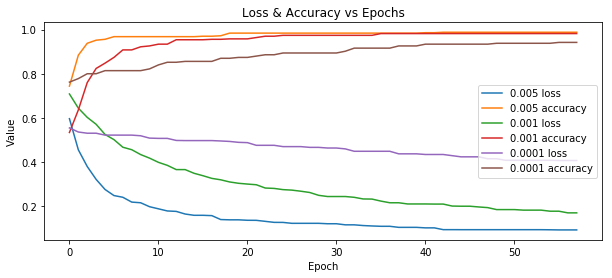

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))
for i,summary in enumerate(summarys):
    s = np.array(summary)
    plt.plot(s[:,0], label=str(LEARNING_RATES[i])+" loss")
    plt.plot(s[:,1], label=str(LEARNING_RATES[i])+" accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Value")

The best learning rate is 0.005 from the graph since it has the fastest decay speed and best final error rate and classification accuracy.

In [107]:
BATCH_SIZE = 500
BEST_LEARNING_RATE = 0.005
weight_decay_scale = 0.01
tf.reset_default_graph()
summarys=[]
trainData_rs = trainData.reshape([trainData.shape[0], -1]) # flattern
validData_rs = validData.reshape([validData.shape[0], -1])
testData_rs = testData.reshape([testData.shape[0], -1])
summary_train=logistic_train(trainData_rs, trainTarget, BEST_LEARNING_RATE, weight_decay_scale, BATCH_SIZE, 400)
tf.reset_default_graph()
summary_valid=logistic_train(validData_rs, validTarget, BEST_LEARNING_RATE, weight_decay_scale, BATCH_SIZE, 400)
tf.reset_default_graph()
summary_test=logistic_train(testData_rs, testTarget, BEST_LEARNING_RATE, weight_decay_scale, BATCH_SIZE, 400)

epoch_size 3500
0 1.0 0.432
7 0.659791 0.63
14 0.491392 0.828
21 0.406853 0.896
28 0.349332 0.928
35 0.307189 0.942
42 0.276575 0.97
49 0.252119 0.97
56 0.235738 0.97
63 0.212538 0.97
70 0.202463 0.972
77 0.201173 0.972
84 0.178842 0.972
91 0.178842 0.974
98 0.171743 0.976
105 0.171743 0.976
112 0.15738 0.976
119 0.15738 0.976
126 0.151114 0.976
133 0.150745 0.982
140 0.141349 0.982
147 0.138836 0.982
154 0.127579 0.982
161 0.127579 0.982
168 0.127579 0.982
175 0.127579 0.986
182 0.124142 0.986
189 0.124142 0.986
196 0.124142 0.986
203 0.124142 0.986
210 0.117015 0.986
217 0.117015 0.986
224 0.117015 0.986
231 0.0998423 0.986
238 0.0998423 0.986
245 0.0998423 0.986
252 0.0998423 0.986
259 0.0998423 0.986
266 0.0998423 0.986
273 0.0998423 0.986
280 0.0998423 0.986
287 0.0968166 0.986
294 0.0968166 0.986
301 0.0968166 0.986
308 0.0968166 0.986
315 0.0968166 0.986
322 0.0968166 0.986
329 0.0968166 0.986
336 0.092407 0.988
343 0.092407 0.988
350 0.092407 0.988
357 0.092407 0.988
364 0.0924

399 0.0845667 0.99
epoch_size 145
0 0.932416 0.206
29 0.30947 0.948
58 0.209783 0.978
87 0.168109 0.978
116 0.144421 0.988
145 0.128847 0.99
174 0.118865 0.99
203 0.110877 0.99
232 0.103482 0.99
261 0.0991975 0.99
290 0.0951084 0.99
319 0.0905634 0.99
348 0.087519 0.99
377 0.0851179 0.99


Text(0,0.5,'Value')

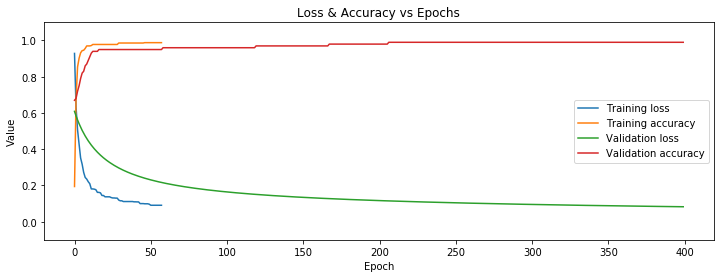

In [96]:
plt.figure(figsize=(12,4))
types = ['Training', 'Validation']
for i,summary in enumerate((summary_train, summary_valid)):
    s = np.array(summary)
    plt.plot(s[:,0], label=types[i]+" loss")
    plt.plot(s[:,1], label=types[i]+" accuracy")
plt.legend()
plt.ylim(-0.1,1.1)
plt.title("Loss & Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Value")

In [108]:
summary_test[-1]

(0.085117914, 0.99000001)

The best classification accuracy for test data is 99.00% for logistic regression model